# Loading data 

In [2]:
library(MCMCpack) # for wakefield 2004
library(ei) # for king 97
library(eco) # for Strauss 2008

gender_data = read.csv("../data/all_gt_gender.csv")
age_data = read.csv("../data/all_gt_age.csv")
gender_data = gender_data[gender_data$N>100,]
age_data = age_data[age_data$N>100,]

Loading required package: coda
Loading required package: MASS
##
## Markov Chain Monte Carlo Package (MCMCpack)
## Copyright (C) 2003-2016 Andrew D. Martin, Kevin M. Quinn, and Jong Hee Park
##
## Support provided by the U.S. National Science Foundation
## (Grants SES-0350646 and SES-0350613)
##
Loading required package: eiPack
Loading required package: msm
eco: Ecological Inference in 2x2 Tables
Version: 3.1-7



In [6]:
calculateMAE <- function(predicted,truth){
  mae <- mean( abs(predicted-truth) , na.rm = TRUE ) 
  return(mae)
}

# Calculating for king

In [23]:
data = gender_data
data = data[data$N>100,]
dbuf = ei(formula=X ~ Y ,total="N",data=data,truth=cbind(data$W1,data$W2), sample = 5000, burnin = 2000, thin = 5, erho = 0.0, esigma = 0.3, ebeta = 0.5)
predicted_W1_king  <- eiread(dbuf, "betab")
predicted_W2_king  <- eiread(dbuf, "betaw")

data = age_data
data = data[data$N>100,]
dbuf = ei(formula=X ~ Y ,total="N",data=data,truth=cbind(data$W1,data$W2), sample = 5000, burnin = 2000, thin = 5, erho = 0.0, esigma = 0.3, ebeta = 0.5)
predicted_W1_king_age  <- eiread(dbuf, "betab")
predicted_W2_king_age  <- eiread(dbuf, "betaw")

[1] "Running 2x2 ei"


Maximizing likelihood
Importance Sampling..


[1] "Running 2x2 ei"


Maximizing likelihood
Importance Sampling..


# Calculating for imai

In [47]:
data = gender_data
res.ML <-  eco(X ~ Y, N = N, data = data, context = TRUE, parameter=TRUE,n.draws = 5000, burnin = 2000, thin = 5, verbose = FALSE,
               mu0=0.1,tau0=0,nu0=6,S0=15,mu.start=0,Sigma.start=19)

# out1 <-predict(res.ML,verbose=TRUE)
# last_pos = length(res.ML$W[,1,1])
# predicted_W1_strauss= res.ML$W[last_pos,1,]
# predicted_W2_strauss= res.ML$W[last_pos,2,]
predicted_W1_strauss <- numeric()
for(i in 0:length(data$N)){
  predicted_W1_strauss[i] <- mean(res.ML$W[,1,i])
}
predicted_W2_strauss <- numeric()
for(i in 0:length(data$N)){
  predicted_W2_strauss[i] <- mean(res.ML$W[,2,i])
}

data = age_data
res.ML <-  eco(X ~ Y, N = N, data = data, context = TRUE, parameter=TRUE,n.draws = 5000, burnin = 2000, thin = 5, verbose = FALSE,
               mu0=0.1,tau0=0,nu0=6,S0=15,mu.start=0,Sigma.start=19)

# out1 <-predict(res.ML,verbose=TRUE)
# last_pos = length(res.ML$W[,1,1])
# predicted_W1_strauss= res.ML$W[last_pos,1,]
# predicted_W2_strauss= res.ML$W[last_pos,2,]
predicted_W1_strauss_age <- numeric()
for(i in 0:length(data$N)){
  predicted_W1_strauss_age[i] <- mean(res.ML$W[,1,i])
}
predicted_W2_strauss_age <- numeric()
for(i in 0:length(data$N)){
  predicted_W2_strauss_age[i] <- mean(res.ML$W[,2,i])
}


# Calculating for wake

In [31]:
data = gender_data

n = length(data$Y)
post <- MCMChierEI(data$Y,(1-data$Y),data$X, (1-data$X), mcmc=5000, burnin= 2000, thin=5, verbose=1000,seed=list(NA, 1),
                   m0= 0.0, M0= 2.3,m1= 0.1, M1 = 2.7, a0=0.7, b0=0.08,a1=0.9,b1=0.03)
predicted_W1_wake  <- colMeans(post)[1:n]
predicted_W2_wake  <- colMeans(post)[(n+1):(2*n)]

data = age_data

n = length(data$Y)
post <- MCMChierEI(data$Y,(1-data$Y),data$X, (1-data$X), mcmc=5000, burnin= 2000, thin=5, verbose=1000,seed=list(NA, 1),
                   m0= 0.0, M0= 2.3,m1= 0.1, M1 = 2.7, a0=0.7, b0=0.08,a1=0.9,b1=0.03)
predicted_W1_wake_age  <- colMeans(post)[1:n]
predicted_W2_wake_age  <- colMeans(post)[(n+1):(2*n)]



MCMChierEI iteration 1 of 7000 

MCMChierEI iteration 1001 of 7000 

MCMChierEI iteration 2001 of 7000 

MCMChierEI iteration 3001 of 7000 

MCMChierEI iteration 4001 of 7000 

MCMChierEI iteration 5001 of 7000 

MCMChierEI iteration 6001 of 7000 

MCMChierEI iteration 1 of 7000 

MCMChierEI iteration 1001 of 7000 

MCMChierEI iteration 2001 of 7000 

MCMChierEI iteration 3001 of 7000 

MCMChierEI iteration 4001 of 7000 

MCMChierEI iteration 5001 of 7000 

MCMChierEI iteration 6001 of 7000 


# Plotting predicted X True

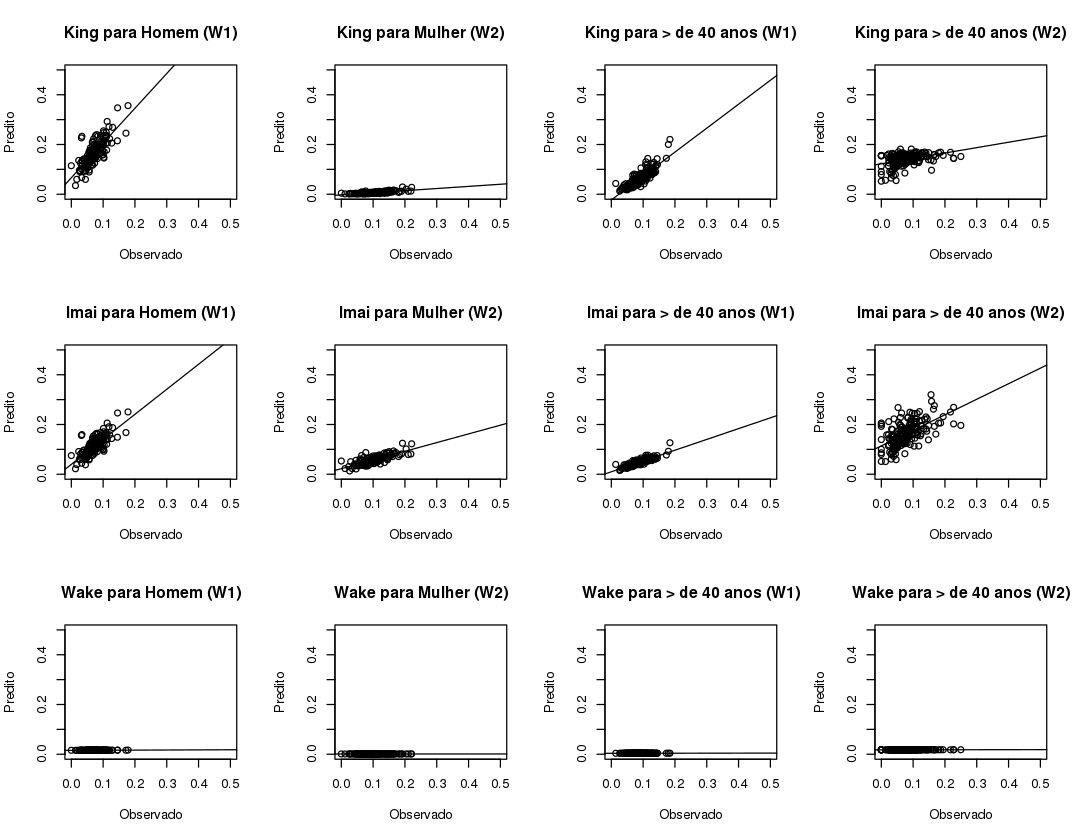

In [48]:

par(mfrow=c(3,4))
options(repr.plot.width=9, repr.plot.height=7)

#plotting kings
regW1 <- lm(predicted_W1_king ~gender_data$W1)
plot(gender_data$W1,predicted_W1_king, xlim = range(0,0.5),ylim=range(0,0.5), xlab="Observado", ylab="Predito", main="King para Homem (W1)")
abline(regW1)
regW2 <- lm(predicted_W2_king ~gender_data$W2)
plot(gender_data$W2,predicted_W2_king, xlim = range(0,0.5),ylim=range(0,0.5), xlab="Observado", ylab="Predito", main = 'King para Mulher (W2)')
abline(regW2)

regW1 <- lm(predicted_W1_king_age ~age_data$W1)
plot(age_data$W1,predicted_W1_king_age, xlim = range(0,0.5),ylim=range(0,0.5), xlab="Observado", ylab="Predito", main="King para > de 40 anos (W1)")
abline(regW1)
regW2 <- lm(predicted_W2_king_age ~age_data$W2)
plot(age_data$W2,predicted_W2_king_age, xlim = range(0,0.5),ylim=range(0,0.5), xlab="Observado", ylab="Predito", main = 'King para > de 40 anos (W2)')
abline(regW2)

#plotting imai
regW1 <- lm(predicted_W1_strauss ~gender_data$W1)
plot(gender_data$W1,predicted_W1_strauss, xlim = range(0,0.5),ylim=range(0,0.5), xlab="Observado", ylab="Predito", main="Imai para Homem (W1)")
abline(regW1)
regW2 <- lm(predicted_W2_strauss ~gender_data$W2)
plot(gender_data$W2,predicted_W2_strauss, xlim = range(0,0.5),ylim=range(0,0.5), xlab="Observado", ylab="Predito", main = 'Imai para Mulher (W2)')
abline(regW2)

regW1 <- lm(predicted_W1_strauss_age ~age_data$W1)
plot(age_data$W1,predicted_W1_strauss_age, xlim = range(0,0.5),ylim=range(0,0.5), xlab="Observado", ylab="Predito", main="Imai para > de 40 anos (W1)")
abline(regW1)
regW2 <- lm(predicted_W2_strauss_age ~age_data$W2)
plot(age_data$W2,predicted_W2_strauss_age, xlim = range(0,0.5),ylim=range(0,0.5), xlab="Observado", ylab="Predito", main = 'Imai para > de 40 anos (W2)')
abline(regW2)

# plotting wake
regW1 <- lm(predicted_W1_wake ~gender_data$W1)
plot(gender_data$W1,predicted_W1_wake, xlim = range(0,0.5),ylim=range(0,0.5), xlab="Observado", ylab="Predito", main="Wake para Homem (W1)")
abline(regW1)
regW2 <- lm(predicted_W2_wake ~gender_data$W2)
plot(gender_data$W2,predicted_W2_wake, xlim = range(0,0.5),ylim=range(0,0.5), xlab="Observado", ylab="Predito", main = 'Wake para Mulher (W2)')
abline(regW2)

regW1 <- lm(predicted_W1_wake_age ~age_data$W1)
plot(age_data$W1,predicted_W1_wake_age, xlim = range(0,0.5),ylim=range(0,0.5), xlab="Observado", ylab="Predito", main="Wake para > de 40 anos (W1)")
abline(regW1)
regW2 <- lm(predicted_W2_wake_age ~age_data$W2)
plot(age_data$W2,predicted_W2_wake_age, xlim = range(0,0.5),ylim=range(0,0.5), xlab="Observado", ylab="Predito", main = 'Wake para > de 40 anos (W2)')
abline(regW2)

In [49]:
# Correlations
cor(gender_data$W1,predicted_W1_king)
cor(gender_data$W2,predicted_W2_king)
cor(gender_data$W1,predicted_W1_wake)
cor(gender_data$W2,predicted_W2_wake)
cor(gender_data$W1,predicted_W1_strauss)
cor(gender_data$W2,predicted_W2_strauss)

[1] 0.782981

[1] 0.7693646

[1] 0.6134224

[1] 0.1933056

[1] 0.7798433

[1] 0.7963567

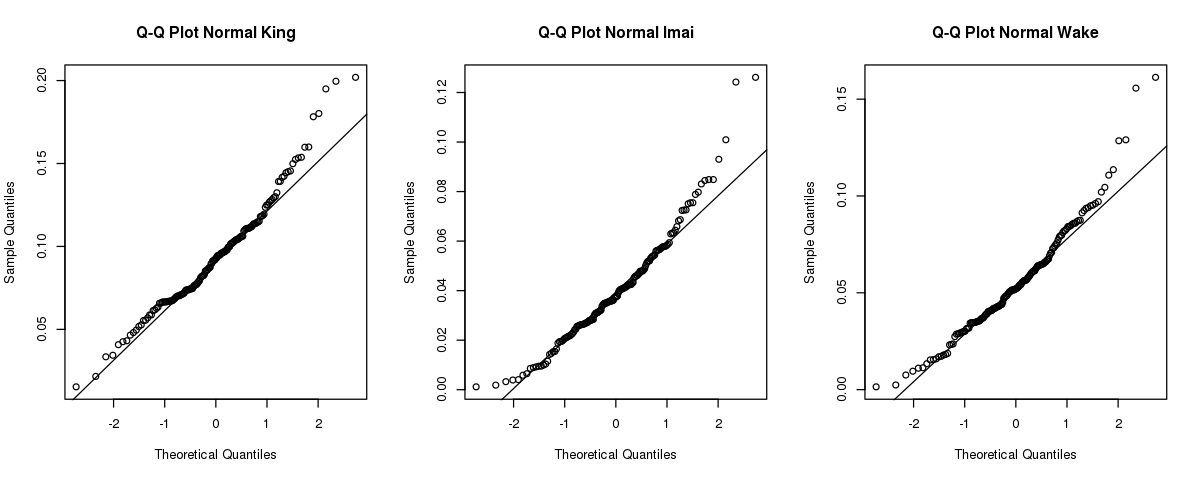

In [73]:
par(mfrow=c(1,3))
options(repr.plot.width=10, repr.plot.height=4)

errors_w1_king = abs(predicted_W1_king-gender_data$W1)  
errors_w2_king = abs(predicted_W2_king-gender_data$W1)  
qqnorm(errors_w1_king, main= "Q-Q Plot Normal King")
qqline(errors_w1_king)
# qqnorm(errors_w2_king)
# qqline(errors_w2_king)
# hist(errors_w1_king)
# hist(errors_w2_king)

errors_w1_strauss = abs(predicted_W1_strauss-gender_data$W1)  
errors_w2_strauss = abs(predicted_W2_strauss-gender_data$W1)  
qqnorm(errors_w1_strauss, main= "Q-Q Plot Normal Imai")
qqline(errors_w1_strauss)
# qqnorm(errors_w2_strauss)
# qqline(errors_w2_strauss)
# hist(errors_w1_strauss)
# hist(errors_w2_strauss)


errors_w1_wake = abs(predicted_W1_wake-gender_data$W1)  
errors_w2_wake = abs(predicted_W2_wake-gender_data$W1)  
qqnorm(errors_w1_wake, , main= "Q-Q Plot Normal Wake")
qqline(errors_w1_wake)
# qqnorm(errors_w2_wake)
# qqline(errors_w2_wake)
# hist(errors_w1_wake)
# hist(errors_w2_wake)
